## Chapter 32
# Properties of Time Series 
Bill Henderson

## Introduction

Time series are an extremely common data type. Just a few of the many applications of time series analysis include:

- **Demand forecasting:** Electricity production, Internet bandwidth, Traffic management, Inventory management
- **Medicine:** Time-dependent treatment effects, EKG, EEG
- **Engineering and Science:** Signal analysis, Analysis of physical processes
- **Capital markets and economics:** Seasonal unemployment, Price/return series, Risk analysis

In this chapter, we will explore some fundamental properties of time series data, in particular:  

- How time series data differ from non-time ordered data.      
- Basic properties of time series:      
  - Correlation properties of time series.      
  - Properties of random walks.  
  - Time series with trends.    
  - Seasonal properties of time series.   
- How to perform and understand the decomposition of time series.    

****
**Resources:** Here is a selection of resources you can use to go deeper into time series analysis with Python:

1. If you would like more information and examples for working with time series data in [Python Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).  
2. The Python [pmdarima package user quide](https://alkaline-ml.com/pmdarima/user_guide.html) provides some hands-on tutorial material.    
3. The Python [KATS time series package](https://facebookresearch.github.io/Kats/) provides a number of state-of-the-art time series methods and models.  
4. The go-to book is *Forecasting, Principles and Practice*, 2nd ed. by Rob J Hyndman and George Athanaspoulos, and is available as an [online book](https://otexts.com/fpp2/).   
5. [Darts](https://unit8co.github.io/darts/index.html), a newly released Python time series package combines state-of-the-art linear models with some powerful deep learning models.  
****

## Short History of Time Series Analysis

The history of time series analysis starts with the pioneering work of George Udny Yule (1927) and Gilbert Walker (1931). Both Yule and Walker developed auto-regressive (AR) models for stochastic time series.

<img src="../images/George_Udny_Yule.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>George Yule; time series pioneer</center>

Mathematical prodigy, Norbert Weiner, invented filters for stochastic time series processes during the Second World War. Weiner worked at MIT and was assigned to a project to improve the accuracy of anti-aircraft guns using the noisy radar signals of the day. He published his seminal paper on the subject in 1949. If you have recently used a mobile phone or streamed video or audio you are benefiting from Wiener's research!

<img src="../images/Norbert_wiener.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>Norbert Weiner: Invented time series filter</center>

The exponential smoothing methods of time series analysis and forecasting were first published by Robert Goodell Brown in 1956, and Charles C. Holt in 1957.

George Box and Gwilym Jenkins fully developed a statistical theory  of time series by extending the work of Yule and Walker in the 1950s and 1960s. This work was fully developed in their seminal 1970  book. Their theory included the autoregressive moving average (ARMA) model and the autoregressive integrated moving average (ARIMA) models we use in this notebook.

George Box was married to Joan Fisher Box, an outstanding statistician in her own right and daughter of Ronald Fisher. 

<img src="../images/GeorgeEPBox.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>George Box fully developed the ARIMA model</center>

<img src="../images/BoxJenkins.jpg" alt="Drawing" style="width:175px; height:250px"/>
<center>Seminal book: by Box and  Jenkins</center>


## How Are Time Series Data Different?

Time series data are different from the data types we have encountered so far. Up until now, we have been able to construct models using the assumption of **independent and identically distributed (iid) errors**. When sampling such data order does not matter.

However, for time series data, the observations are ordered by time and the observed values are **serially correlated**. For serially correlated data, the value of an observation will depend on one or more of the previous observations. Just a few of the many examples of data exhibiting serial correlation of the values include      
- Temperature forecasts, where the future values are correlated with the current values. 
- The opening price of a stock is correlated with the price at the previous close. 
- The daily sales volume of a product is correlated with the previous sales volume. 
- A medical patient's blood pressure reading is correlated with the previous observations.   

Given the serial correlation common in time series data, we will need models which account for this behavior. In this lesson our focus will be on a class of models known as **autoregressive integrative moving average (ARIMA) models**. These are linear models which account for the serial correlation in time series data.     

> **Note:** In this lesson we will work with the time series tools available in the Python Pandas, [statsmodels](http://www.statsmodels.org/stable/user-guide.html#time-series-analysis) and [pmdariama](https://alkaline-ml.com/pmdarima/) packages. However, the state-of-the-art time series models are often found in R packages. You can find considerable information on state-of-the-art time series forecasting in the blogs, R packages and books on time series with R on [Rob Hyndman's](https://robjhyndman.com/) web site. 



## Working with Time Series in Pandas

The Pandas package has significant capabilities for manipulation of time series data. The key to working with time series data is the index of the Pandas series or data frame. The index contains the [date-time information](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) or [time delta (interval) information](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html). 

Let's start with a simple univariate time series example. A univariate time series can be represented as a Pandas series, with the appropriate index. 

> **Note:** The use of a [Pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object to hold a univariate time series may seem redundant or confusing. The time series is a time-ordered sequence of data values. Whereas, the Pandas Series object is a univariate data structure. A Pandas Series object contains time series data when an appropriate time series index is used. 

The code in the cell below creates a series of sinusoidal values. Execute this code and examine the results.

In [61]:
from math import sin
import pandas as pd
import numpy as np
import numpy.random as nr
from math import pi
from scipy.stats import zscore
import sklearn.linear_model as lm
import statsmodels.tsa.seasonal as sts
import scipy.stats as ss
import statsmodels.tsa.arima_process as arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import pmdarima as pm
import statsmodels.graphics.tsaplots as splt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

%matplotlib inline

ts = pd.Series([sin(x/30.0) for x in range(366)])
ts.head(20)

0     0.000000
1     0.033327
2     0.066617
3     0.099833
4     0.132939
5     0.165896
6     0.198669
7     0.231222
8     0.263517
9     0.295520
10    0.327195
11    0.358506
12    0.389418
13    0.419898
14    0.449912
15    0.479426
16    0.508407
17    0.536823
18    0.564642
19    0.591835
dtype: float64

The object you created is a series of floating point values. However, this is not yet a time series object, since there is no time indexing. For that, we need to add a time index or time difference index.

The code in the cell below adds a new set of index values to the Pandas Series object. Execute this code and examine the results. 

In [62]:
ts.index = pd.date_range(start = '1-1-2016', end = '12-31-2016', freq = 'D')
ts.head(20)

2016-01-01    0.000000
2016-01-02    0.033327
2016-01-03    0.066617
2016-01-04    0.099833
2016-01-05    0.132939
2016-01-06    0.165896
2016-01-07    0.198669
2016-01-08    0.231222
2016-01-09    0.263517
2016-01-10    0.295520
2016-01-11    0.327195
2016-01-12    0.358506
2016-01-13    0.389418
2016-01-14    0.419898
2016-01-15    0.449912
2016-01-16    0.479426
2016-01-17    0.508407
2016-01-18    0.536823
2016-01-19    0.564642
2016-01-20    0.591835
Freq: D, dtype: float64

You can see that the index is now the date-time for each value. This Pandas series is now an actual time series. 

Let's plot the time series. The code in the cell below plots the values of the time series against the index. Notice that there is no need to explicitly specify the values for the x-axis as these values are implied by the index of the Pandas Series object. Execute the code and examine the results. 

Text(0.5, 0, 'Date')

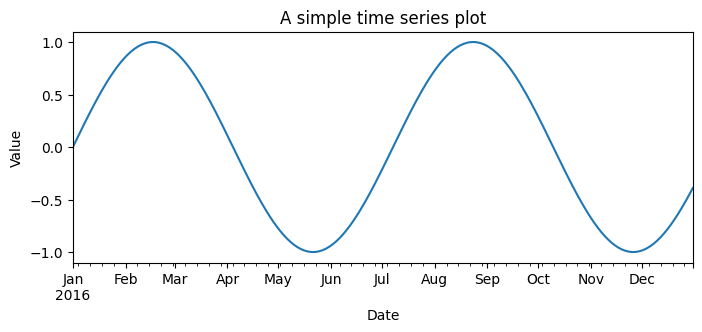

In [63]:
_,ax = plt.subplots(figsize=(8,3))
ts.plot(ax=ax)
ax.set_title('A simple time series plot')
ax.set_ylabel('Value')
ax.set_xlabel('Date')

You can see that the time axis is labeled automatically. 

Pandas provides many methods to [manipulate and transform time series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). For example, one can subset a time series using a range of time values from the index. The code in the cell below takes a subset of the time series by specifying a date range and displaying a plot. Execute this code and examine the result. 

Text(0.5, 0, 'Date')

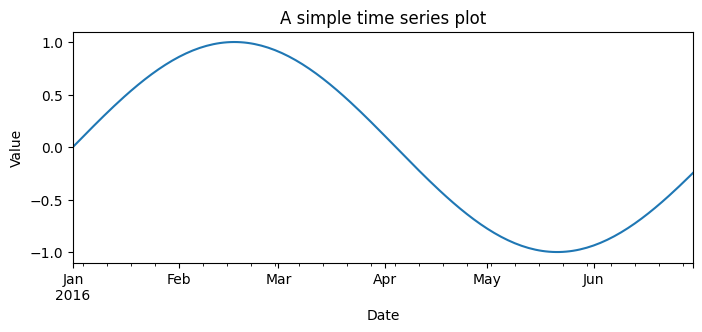

In [64]:
_,ax = plt.subplots(figsize=(8,3))
ts['1/1/2016':'6/30/2016'].plot(ax=ax)
ax.set_title('A simple time series plot')
ax.set_ylabel('Value')
ax.set_xlabel('Date')

Notice that the plot covers the subset of dates specified. 

## Basic Time Series Properties

In this section, we will explore some basic properties of time series. Understanding these properties will help you understand the fundamental properties of time series, including    
1. Random **white noise series** are time series of random uncorrelated values. The is no predictive information in a white noise series.    
2. The **correlation** properties of time series, differentiate these data from unordered data. We can deduce several important properties of time series from the study of their correlation properties.   
3. The concept of **stationarity** is a foundation on which many time series models rely. In simple terms, a stationary time series has statistical properties that are invariant in time.  
3. Time series with **random walks** have drift  
4. Long-term **trend** is a common property of time series.    

### Properties of White Noise Series

A random series is **independent identically distributed (iid)** noise drawn from a Normal distribution. Such a series is said to be a **white noise** series. Since the series is iid there is no correlation from one value to the next. We can write a **discrete** white noise time series as just:

$$X(t) = (w_1, w_2, w_3, \dots, w_n)\\
where\\
w_t \sim \mathbb{N}(0, \theta)$$

Notice that the standard deviation and therefore the variance of the series, $\theta$, is constant in time. We say that a time series with a constant variance is **stationary**. The statistical properties of a stationary time series do not vary with time. 

Further, the values of the time series are given at specific or discrete times, making this a **discrete time series**. In computational time series analysis, we nearly always work with discrete time series. Some time series are inherently discrete including, the unemployment rate average over a month, and the daily closing price of a stock. Even if the underlying time series is continuous, we typically work with **values sampled at discrete points in time**. For example, temperature is a continuous variable, but we will generally work with sampled values, such as hourly measurements. 

The code in the cell below creates a time series from an iid Normal distribution with mean zero. Execute this code and note the attributes and the plot.

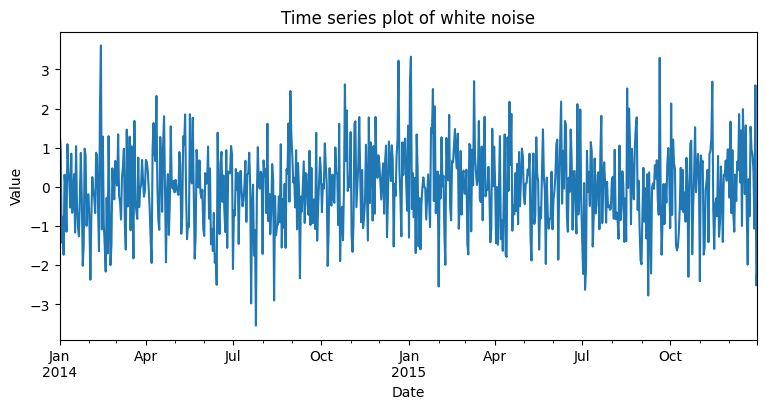

In [65]:
def plot_ts(ts, lab = ''):
    _,ax = plt.subplots(figsize=(9,4))
    ts.plot(ax=ax)
    ax.set_title('Time series plot of ' + lab)
    ax.set_ylabel('Value')
    ax.set_xlabel('Date')

nr.seed(3344)
white = pd.Series(nr.normal(size = 730),
                 index = pd.date_range(start = '1-1-2014', end = '12-31-2015', freq = 'D'))
plot_ts(white, 'white noise')

Notice that the values of the time series seem to wander randomly around zero, with no particular trend. 

Next, let's look at the distribution of the time series values. The code in the cell below plots the histogram and Q-Q Normal plot of the values of the time series. Run this code and examine the results.  

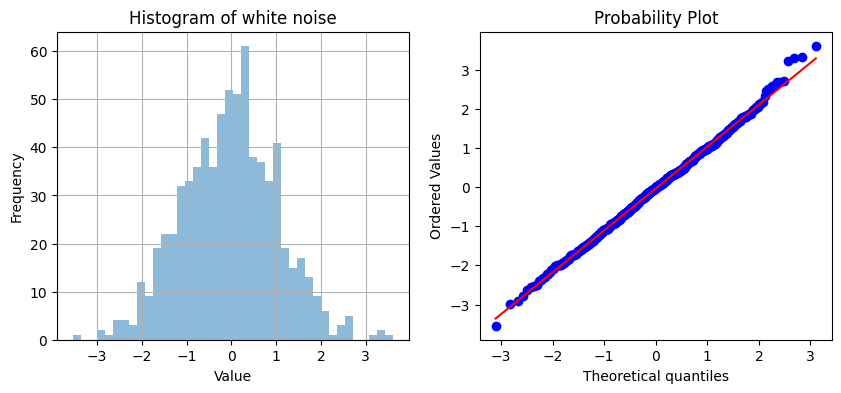

In [66]:
def dist_ts(ts, lab = '', bins = 40):
    _,ax = plt.subplots(1,2,figsize=(10,4))
    ## Plot the histogram with labels
    ts.hist(ax = ax[0], bins = bins, alpha = 0.5);
    ax[0].set_xlabel('Value');
    ax[0].set_ylabel('Frequency');
    ax[0].set_title('Histogram of ' + lab);
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax[1]);

dist_ts(white, 'white noise')    

As expected, the values of the white noise series are Normality distributed. When examining these plots keep in mind there are only 365 values, so we should expect quite a lot of random variation. 

### Autocorrelation of White Noise Series

The values of the white noise series are iid, so we do not expect the values to show any dependency over time. In time series analysis we measure dependency using **autocorrelation**. Autocorrelation is the correlation of a series with itself **lagged** (offset in time) by some number of time steps. Autocorrelation at lag k can be written as    

$$\rho_k = \frac{\gamma_k}{n \sigma^2} = \frac{1}{n \sigma^2} \sum_{t = 1}^N (y_{t} - \mu) \cdot (y_{t-k} - \mu)$$      
Where:   
\begin{align}
y_t &= observation\ at\ time\ t\\ 
k &= lag\\
\gamma_k &= covariance\ lag\ k\\
\mu &= mean\ of\ the\ series\\ 
\sigma^2 &= variance\ of\ the\ series = \frac{1}{n-1}\Sigma_{t = 1}^N (y_{t} - \mu) \cdot (y_{t} - \mu)
\end{align}

Notice that for any series, $\rho_0 = 1$. In other words, the autocorrelation of a series at **lag zero** equals 1.0. 
T
We can also define a second order **partial autocorrelation**. The Partial autocorrelation at lag k is the correlation that results from removing the effect of any correlations due to the terms at smaller lags.

Let's plot the autocorrelation function (acf), using [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html), and partial autocorrelation function (pacf), using [statsmodels.graphics.tsaplots.plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html), of the white noise series. Run the code in the cell below to compute and plot these functions. 

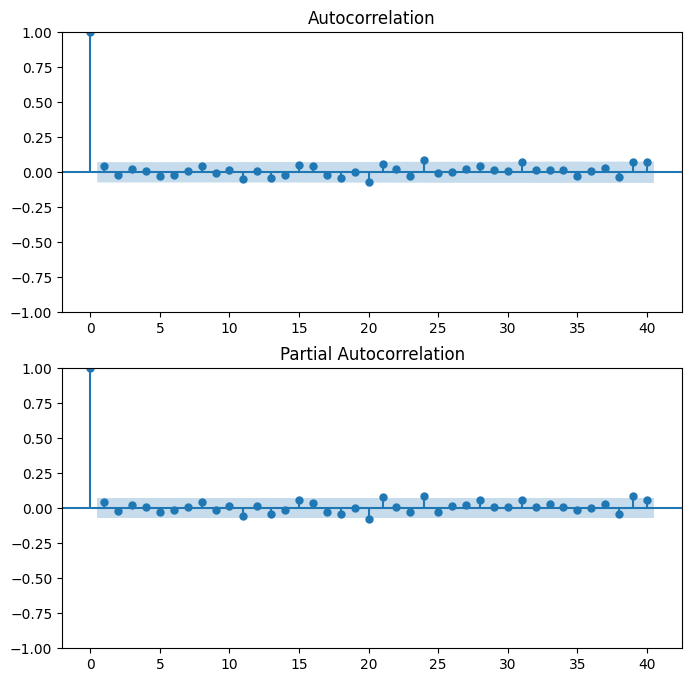

In [67]:
def auto_partial_corr_plot(ts):
    _,ax = plt.subplots(2,1, figsize=(8,8))
    _=splt.plot_acf(ts, lags = 40, ax=ax[0]);
    _=splt.plot_pacf(ts, lags = 40, method='yw', ax=ax[1]);

auto_partial_corr_plot(white)

As expected the white noise series only has significant autocorrelation and partial autocorrelation values at lag zero. There are no significant partial autocorrelation values. The shaded blue area on these plots shows the **95% confidence interval**. 

****
**Note:** The Python statsmodels package uses the engineering convention for displaying partial autocorrelation. The value at 0 lag, which always must be 1.0, is displayed. In many statistical packages, including R, this 0 lag value is not displayed. This difference in conventions can lead to a lot of confusion. 
****

### Hypothesis tests on autocorrelation      

Visually, we can see that the ACF and PACF for the white noise series have values largely within the 95% confidence interval of zero. While visual inspection is always a good idea, in some marginal cases, it will be worth doing a formal hypothesis test to determine if a series is in fact white noise. These tests are performed on the distribution of the ACF values over some number of lags. This distribution turns out to be approximate $\chi^2$ making the compuation of p-values simple. 

There are a number of such tests, several of which are supported in the [Statsmodels Regression Diagnostics and Specification Tests](https://www.statsmodels.org/dev/diagnostic.html#autocorrelation-tests) packages. Here, we will focus on the [Ljung-Box Q statistic](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html#statsmodels.stats.diagnostic.acorr_ljungbox), which is known to have a distribution that is a good approximatiion to the $\chi^2$ distribution. The Ljung-Box Q statistic is based on autocorrelation of at multiple lag values, $\rho_i$. The null hypothesis is that there is no serial correlation between the values, and that the values are independently distributed. The alternative hypothesis is that there is serial correlation giving high values of the Ljung-Box Q statistic and a small p-value. The Ljung-Box Q statistic is computed from the following relationship:           

$$Q = n(n+2) \sum_{k=1}^h \frac{\hat{\rho}^2_2}{n-k}$$

> **Exercise 32-1:** In the cell below create and execute code to do the following:    
> 1. Create a monthly series `(freq = 'M')` of white noise plus 2.0 times a sinusoidal component, with a 12-month period. Use a date range from January 2001 to January 2016. Name your series `ts_periodic`. The white noise component should have a mean of 0 and a standard deviation of 1.0. **Hint:** You will need to use the `pi` constant from the `math` library. The sinusoidal component will be `2 * numpy.sin(pi*x/6)`. Use `numpy.random.seed(6677)` to set the random number seed.    
> 2. Create a time series plot of the result. Then plot the acf and pacf of the time series for 40 lags.   

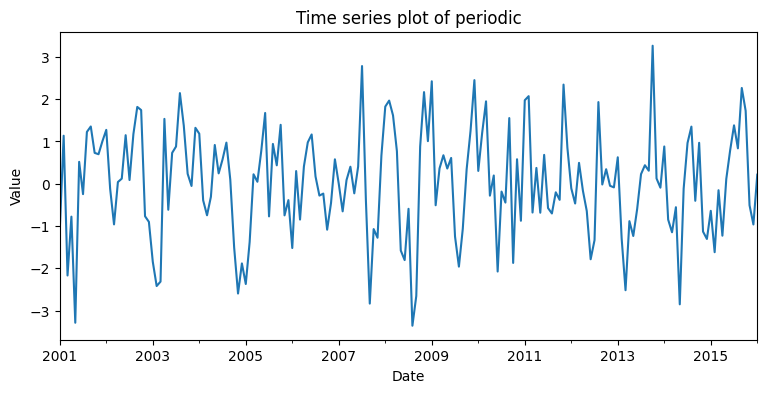

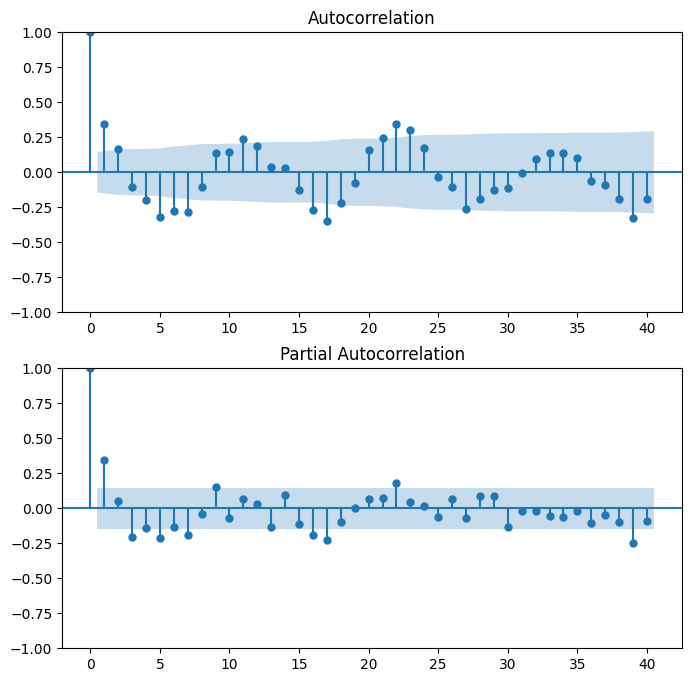

In [68]:
## Put you code below
date_index = pd.date_range(start = '1-1-2001', end = '1-1-2016', freq = 'MS')
white = pd.Series(nr.normal(size = len(date_index)),date_index)
ts_periodic = pd.Series([sin(12*x) for x in range(len(date_index))],index = date_index)  + white


plot_ts(ts_periodic, 'periodic')
auto_partial_corr_plot(ts_periodic)

> 3. Apply the [acorr_ljungbox](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html) function to the white noise series and the periodic time series with `lags=40` and `model_df=0`.     

In [69]:
## Put your code below
print(acorr_ljungbox(white, lags=40, model_df=0))
print(acorr_ljungbox(ts_periodic, lags=40, model_df=0))



      lb_stat  lb_pvalue
1    1.428598   0.231993
2    1.612002   0.446641
3    3.183147   0.364240
4    3.213663   0.522727
5    3.344021   0.647109
6    3.647447   0.724260
7    5.579288   0.589638
8    6.561531   0.584591
9    6.888217   0.648757
10  10.950769   0.361366
11  12.954791   0.296290
12  15.245414   0.228289
13  19.923164   0.097143
14  21.713058   0.084706
15  23.641648   0.071434
16  23.761156   0.094852
17  25.079355   0.092947
18  25.102815   0.122110
19  25.278855   0.151567
20  26.712811   0.143539
21  26.880689   0.174837
22  28.585615   0.157076
23  29.748335   0.156763
24  30.176470   0.178972
25  30.647221   0.200967
26  31.614270   0.206184
27  31.807314   0.239296
28  34.053129   0.199129
29  36.786676   0.151760
30  37.244350   0.170129
31  39.670412   0.136643
32  43.533534   0.083959
33  49.504777   0.032452
34  53.773651   0.016839
35  54.189795   0.020236
36  56.124291   0.017435
37  56.942247   0.019118
38  57.680104   0.021248
39  60.603605   0.014882


> Examine these results and answer the following questions:     
> 1. What do the ACF and PACF tell you about the periodicity of the series?      
> 2. Does the significance of the periodic series of the acf and pacf change with lag?     
> 3. Examine Ljung-Box Q statistic and p-values for the white noise series and the period series. What can you say about the significance of serial correlation for these two series?    

> **Answers:**  
> 1. The ACF and PACF definitely identified sinusoidal periodicity like we created.     
> 2. Yes, the lower lags show higher significance on some values which seems to taper with time on the PACF, but they're realtively consistent on the ACF.          
> 3. With the $lb\_pvalue$ being $1-p\_value$ so with as high the values are on the white noice set, we cannot reject the null hypothesis, so our data may be IID. This is not the case with the very low values for the $ts\_periodic$ test.           

### Random Walks

A **random walk** is defined by the sum of a white noise series. Since the random walk is the sum of all previous white noise terms, we say a random walk is **integrative**. In other words, the value of the random walk is the **cumulative sum of the preceding white noise series**. 

$$y_t = y_{t-1} + w_t$$

Where the $w_t$ is Normally distributed with variance $\sigma$: 

$$w_t \sim \mathbb{N}(0,\sigma)$$

The **innovations** of the random walk, $w_t$, are the **first order differences** of the time series values:   

$$w_t = y_t - y_{t-1}$$ 

Or, with a little bit of algebra, it is easy to show that:    

$$y_t = y_0 + w_t + \sum_{i=1}^{t-1} w_i$$

Where $y_0$ is an initial value.   

The forgoing sum accumulates over the history of the time series. This property leads to the term **integrative** being used for random walk components of time series. This is an example of a **stochastic process**, having random behavior over time.    

But note that the covariance of a random walk increases with time and is not bounded.

$$\gamma_k = Cov(y_t, y_{t+k}) = t \sigma^2 \rightarrow \infty\ as\ t \rightarrow \infty$$

Therefore, the random walk is **not stationary** . 

The code in the cell below computes a random walk series by taking the cumulative sum over Normally distributed innovations. Run this code and examine the results. 

/var/folders/yx/p_q7lg1d7l9gxgp19507kcr00000gr/T/ipykernel_6842/3978478879.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = start, end = end, freq = freq)


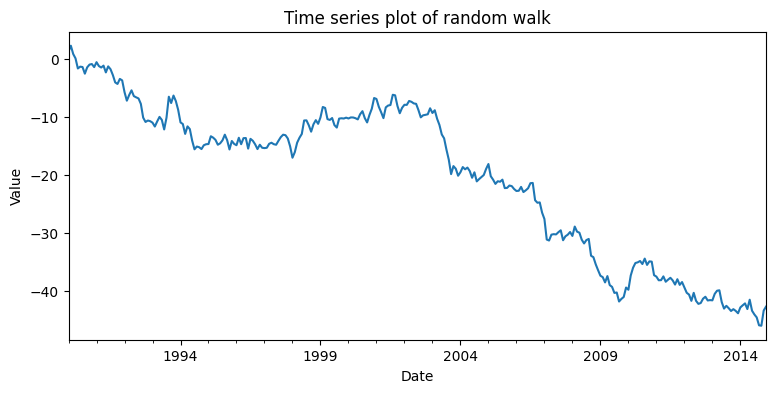

In [70]:
nr.seed(3344)
def ran_walk(start = '1-1990', end = '1-2015', freq = 'M', sd = 1.0, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    walk = pd.Series(nr.normal(loc = mean, scale = sd, size = len(dates)),
                    index = dates)
    return(walk.cumsum())
walk = ran_walk()   
plot_ts(walk, 'random walk')

The random walk wanders back and forth somewhat randomly. A random walk may appear to follow a trend, but there is no reason to believe the trend will continue. 

> **Exercise 32-2:** What does the distribution of values of the random walk time series look like? What about the ACF and PACF of the random walk? In the cell below, create and execute the code to examine the probability distribution, ACF and PACF of the random walk. 

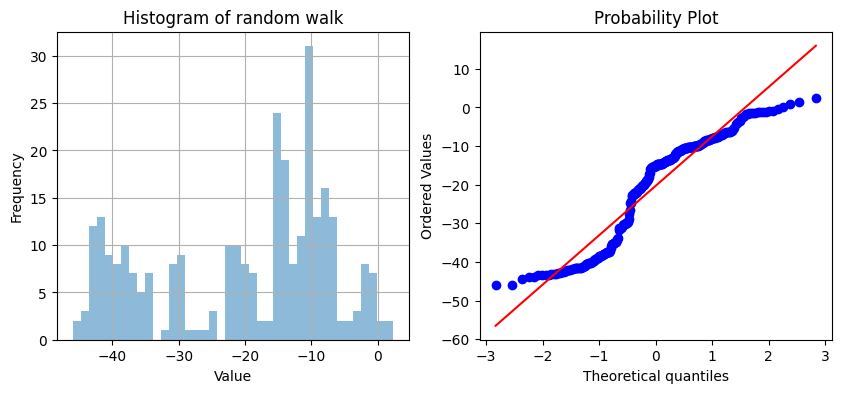

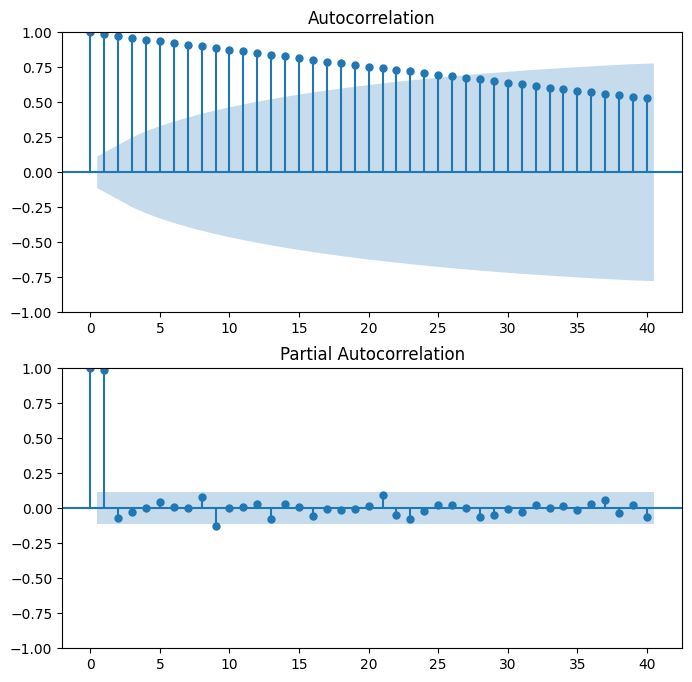

In [71]:
## Put your code below
dist_ts(walk, 'random walk')
auto_partial_corr_plot(walk)


> Examine these results and answer the following questions:    
> 1. How close to Normally distributed are the values of the random walk?    
> 2. How are the properties of the ACF and PACF different from those of the white noise series and why?    
> 3. How can you explain the difference between the ACF and PACF in terms of the serial correlation properties of a random walk?    

> **Answers:**   
> 1. The values of the random walk are not normally distributed.          
> 2. The ACF is different from the white noise since it has high correlation with lower lags, lowering with significance with higher lags. The PACF looks a lot like the white noise PACF plot.         
> 3. The random walk is closely correlated to its last entry, and less so the further from that point, which is why the ACF is seen as a descending curve. Since the strong correlation is highest for the last value, the partial correlation taking more past values into account reduces the correlation.        

### White Noise Series with Trend

What happens when we add a trend to the white noise series? Run the code in the cell below which adds a linear trend to a white noise series. 

/var/folders/yx/p_q7lg1d7l9gxgp19507kcr00000gr/T/ipykernel_6842/1129225666.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = start, end = end, freq = freq)


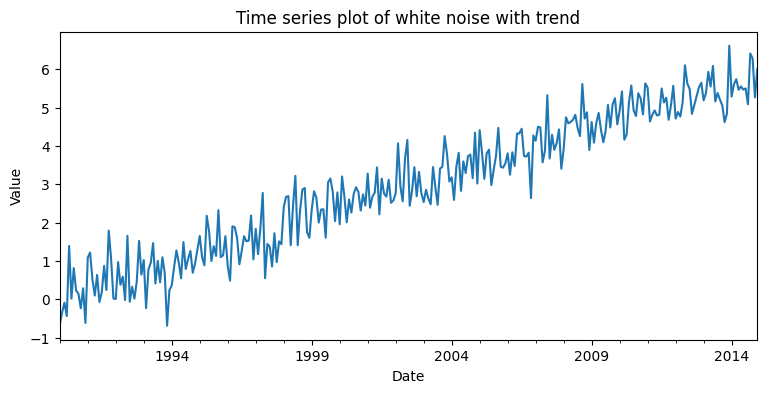

In [72]:
nr.seed(6677)
def trend(start = '1-1990', end = '1-2015', freq = 'M', slope = 0.02, sd = 0.5, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    trend = pd.Series([slope*x for x in range(len(dates))],
                    index = dates)
    trend = trend + nr.normal(loc = mean, scale = sd, size = len(dates))
    return(trend)
                              
trends = trend()   
plot_ts(trends, 'white noise with trend')

As expected, the time series trends upward with a linear trend with iid Normal deviations. 

Run the code in the cell below to examine the distribution of values in this time series.

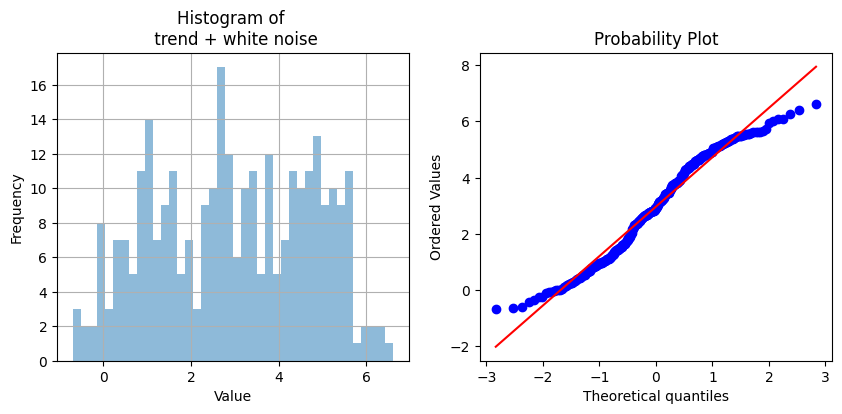

In [73]:
dist_ts(trends, lab = '\n trend + white noise')

The distribution shows some skew when compared to a Normal distribution. You can observe the skew as the 'S' shaped curve in the quantiles values.  

How does adding a trend change the ACF and PACF? Run the code in the cell below and examine the results. 

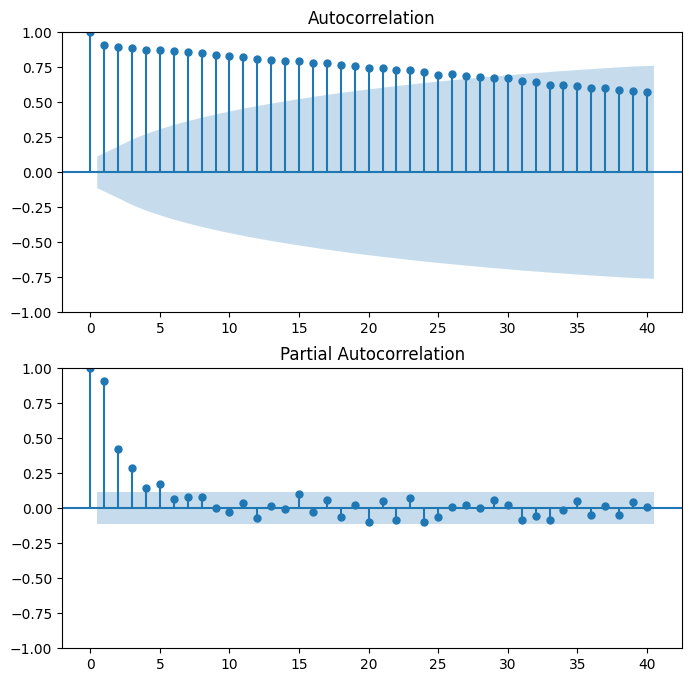

In [74]:
auto_partial_corr_plot(trends)

Note that the ACF decays slowly, as was the case with the random walk. In addition, the PACF shows significant values for several lags. This is the result of the trend creating dependency from one value to the next. Any time series with a trend is **not stationary**.

### Time Series with a Seasonal Component

Many real-world time series include a seasonal component. A seasonal component is a period variation in the values of the time series. The periods can be measured in years, months, days, days of the week, hours of the day, etc. Some examples of seasonal components of time series include:

- Option expiration dates in capital markets.
- Annual holidays which can affect transportation, utility use, shopping habits, etc.
- Weekend vs. business days, which account for volumes of certain transaction behavior.
- Month of the year which can affect employment statistics, weather, etc.   
- Super Bowl Sunday. 
- Sunspot cycles.   

Let's investigate the properties of a time series with a seasonal component. The code in the cell below creates and plots a time series with the sinusoidal seasonal component, a trend, and added White noise. Run this code and examine the results.

/var/folders/yx/p_q7lg1d7l9gxgp19507kcr00000gr/T/ipykernel_6842/754932207.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = start, end = end, freq = freq)


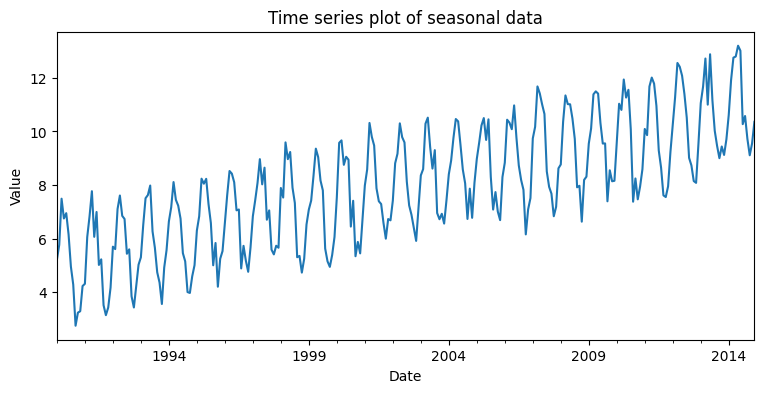

In [75]:
nr.seed(5544)
def seasonal_ts(start = '1-1990', end = '1-2015', freq = 'M', slope = 0.02, sd = 0.5, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    seasonal = pd.Series([slope*x for x in range(len(dates))],
                    index = dates)
    seasonal = seasonal + nr.normal(loc = mean, scale = sd, size = len(dates))
    seasonal = seasonal + [2.0*sin(pi*x/6) for x in range(len(dates))] + 5.0
    return(seasonal)

seasonal = seasonal_ts()
plot_ts(seasonal, 'seasonal data')

As expected, the time series looks like a noisy sine wave with a trend.

> **Exercise 32-3:** What does the distribution of values of the seasonal time series look like? What about the ACF and PACF of the seasonal time series? In the cell below, create and execute the code to examine the probability distribution, ACF, and PACF of this time series. 

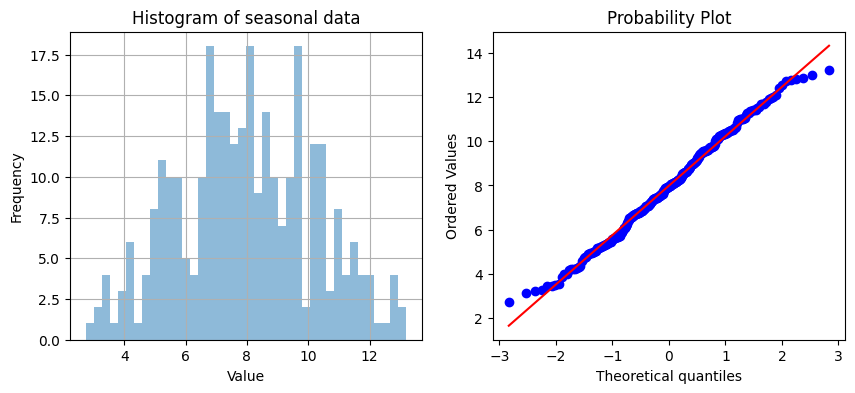

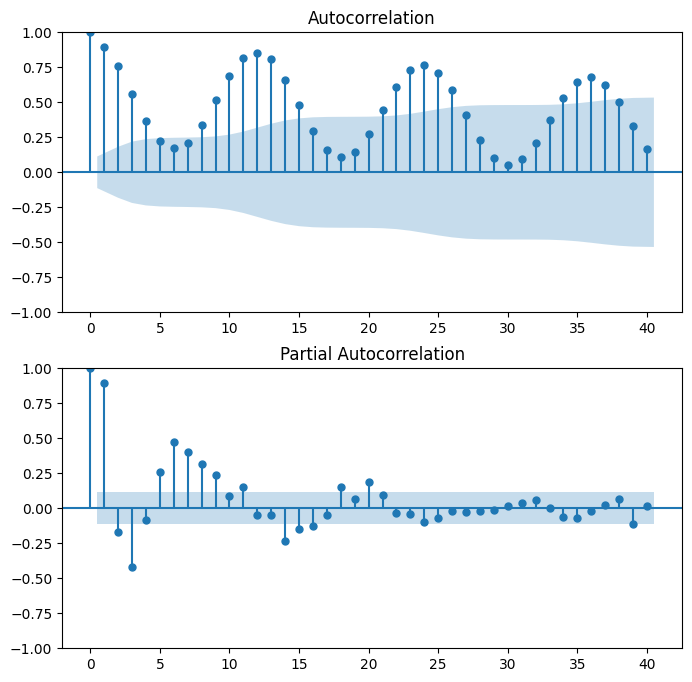

In [76]:
## Put your code below
dist_ts(seasonal, 'seasonal data')
auto_partial_corr_plot(seasonal)


> Answer the following questions:
> 1. How close to Normally distributed are the values of the seasonal time series? 
> 2. What do the ACF and PACF tell you about the periodicity of the series?      
> 3. Does the significance of the periodic behavior of the acf and pacf change with lag?  

> **Answers:**    
> 1. The values of the seasonal time series make a reasonably good normal distribution, with some deviation.          
> 2. Both the ACF and PACF show periodic behavior.    
> 3. The significance of the periodic behavior is most significant at lower lag values and decays over time. The decay is much faster for the PACF.         

## Stationarity       

As was previously mentioned, **a time series with statistical properties that are invariant in time is considered stationary**. There are a number of ways to determine if a time series is stationary. Conversely, one can be certain that a time series is not stationary if it has any of the following properties:     
1. Random walk.    
2. Trend.   
3. Seasonality.   
4. Non-constant variance.   

Note, however, that having a stationary series does not preclude the presence of serial correlations. Do not confuse these points! Many time series models focus on the serial correlation properties of time series but require stationarity.   

A simple model for a time series process with white noise can be written:   

\begin{align}
y_t &= \phi y_{t-1} + w_t\\
w_t &\sim \mathbb{N}(0,\sigma)
\end{align}

The above is an example of an **autoregressive model**, where the next value at the next time step depends on the current value. We will revisit these models in the next chapter.   

The change from time $t-1$ to time $t$ can easly be worked out by taking the differences: 

$$\Delta y_t = (1- \phi) y_{t-1} + w_t$$

The foregoing equation has a root at $\phi = 1$, known as the **unit root**. At the root the difference between the difference between $y_t$ and $y_{t-1}$ is just $w_t$, giving rise to a random walk, which is stochastic and **not stationary**:   

$$y_t = \sum_{i=1}^t w_i$$ 

This example gives us a way to create hypothesis tests for stationarity. We can test the hypothesis that there is a unit root to determine if a time series is stationary or not. However, there is another consideration we must deal with. There are, in fact, several ways to define a model for a stationary process:    

1. A **unit root test** as discused above.   

$$y_t = \phi y_{t-1} + w_t$$

2. A **unit root test with a constant**, which includes a constant value in the formulation. Often this constant is some initial value, $c=y_0$, or a mean value. 

$$y_t = c + \phi y_{t-1} + w_t$$

3. A **Trend stationary process**, which may or may not include a constant. This version is used to test if a process is **stationary about a deterministic trend**, $\beta$. 

$$y_t = c + \beta t + \phi y_{t-1} + w_t$$

Given the foregoing, one can see that it is **important to correctly specify the correct model** for the case you are investigating! Failure to do so will result in erroneous results.    

There is another significant issue one must be aware of when working with unit root tests. There can be only a small difference between a time series with a unit root, which is non-stationary, and a time series with a root close to a unit, which is a stationary time series. As a result, unit root tests are said to **lack power**. This lack of power can have serious implications, since a hypothesis test may not be able to reject a hypothsis of non-stationary, when the time series in fact is, or in other cases, the oposite might be true. In practice, it is best to perform a visual inspection of the properties of the time series and well as perform unit root tests.   

We will work with two of the many possible tests here:            

1. A commonly used test is the [**Augmented Dicky-Fuller test**](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) or **ADF** test. The ADF tests are unit root tests of the significance of a linear time series model. Coefficients represent components of the time series, such as trend and lagged differences, that make the series non-stationary. The **null distribution is that the series is non-stationary**.       

2. The [**Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test**](https://en.wikipedia.org/wiki/KPSS_test) is a unit root test for stationarity. The **null hypothesis is that the time series is stationary**. The KPSS test can inlcude a trend termm, wherein the null hypothesis is that the series is trend-stationary.    

For the examples here, we will focus on the unit root with a constant and unit root with the trend and a constant since Statsmodels supports both options for the foregoing tests.          

Execute the code in the cell below which applies the ADF and KPSS tests to the series created above using two regression models for the tests.    

In [77]:
def test_stationarity(series, regression_model='c', rounding=3):
    """Function to test the stationarity of time series using:
    1. Augmented Dicky Fuller test using AIC 
    2. KPSS test for constant
    
    Arguments:  
        Series: the time series to be evaluated.   
        regression_model: model to be used:   
            'c' - model with a constant   
            'ct' - model with a constant and trend  
        rounding: the number of digits to display in printed output.   
    """
    if regression_model not in ['c','ct']:    
        print('Error!: argument regression model must be one of {\'c\',\'ct\'}')
        return
    with warnings.catch_warnings(): 
        warnings.filterwarnings("ignore")
        kpss_test = kpss(series, regression=regression_model)
        ADF_test = adfuller(series, regression=regression_model, autolag="AIC")
    return [round(ADF_test[0],rounding), round(ADF_test[4]['5%'],rounding), round(ADF_test[1],rounding),
                                       round(kpss_test[0],rounding), round(kpss_test[1],rounding)]

def stationary_tests(series, names, regression_model='c', rounding=3):
    test_columns = ['ADF_statistic','ADF_conf_int','ADF_p_value','KPSS_statistic','KPSS_p_value']
    out = pd.DataFrame(index=names, columns=test_columns)    
    for ser, name in zip(series,names):  
        out.loc[name,:] = test_stationarity(ser, regression_model=regression_model, rounding=rounding)
    return out
        

time_series = [white,ts_periodic,walk,trends,seasonal]
names = ['white','ts_periodic','walk','trends','seasonal']

for model in ['c','ct']:
    print('\nFor model ' + model)
    print(stationary_tests(time_series, names, regression_model=model))  


For model c
            ADF_statistic ADF_conf_int ADF_p_value KPSS_statistic KPSS_p_value
white               -12.2       -2.878         0.0          0.042          0.1
ts_periodic        -8.253       -2.878         0.0           0.02          0.1
walk               -0.595       -2.871       0.872          2.439         0.01
trends             -0.249       -2.872       0.932          2.827         0.01
seasonal           -0.124       -2.872       0.947          2.725         0.01

For model ct
            ADF_statistic ADF_conf_int ADF_p_value KPSS_statistic KPSS_p_value
white              -12.18       -3.435         0.0          0.031          0.1
ts_periodic        -8.323       -3.436         0.0          0.018          0.1
walk               -1.636       -3.425       0.778          0.475         0.01
trends            -17.486       -3.425         0.0          0.092          0.1
seasonal           -3.575       -3.426       0.032          0.016          0.1


> **Exercise 32-4:** Examine these resutls and answer the following questions:    
> 1. For the constant model, given the value of the ADF and KPSS statistics and the p-values, for which of these time series can we reject the null hypothesis of non-stationarity and why? Pay particular attention to the differences between the ADF and KPSS tests.     
> 2. For the trend plus constant model, given the value of the ADF and KPSS statistics and the p-values, for which of these time series can we reject the null hypothesis of non-stationarity and why? Pay particular attention to the differences between the ADF and KPSS tests.     
> 3. Which series can we conclude is non-statonary for all tests and why does this result make sense?     
> 4. As was discussed above, unit root tests have low power. Based on p-values and known properties of the time series, which cases can you identify where poor, or unexpected, inferences would result?   

> **Answers:** 
> ADF Non-stationary
> KPSS stationary
> 1. The tests we can say are non-stationary with the datasets with just a constant are walks, trends, and seasonal since their ADF p values are high, showing we cannot reject the null of non-stationary behavior and low p values on the KPSS showing we can reject the null of stationary behavior.
> 2. For the CT data sets, the only non-stationary set per both tests is the walks dataset for the same reasons as the above question.
> 3. The random walk is the only non-stationary dataset per both tests, which makes sense since it's defined as a deviation off of the last entry, which makes it consistently non-stationary. 
> 4. The results for the $ts\_periodic$ were very surprising knowing that the sinusoid we injected should have added a very time based variance in the dataset, but the tests showed it was stationary. Trends and seasonal showing up as stationary for the CT grouping of ADF tests was also odd since we know that there is some time based variance in both of those data sets as shown by them showing up as non-stationary in the C group, it's interesting that adding the trend made them look stationary to the ADF.          

In the next two sections, we will explore decomposition methods for time series. The goal of these methods is to separate the non-stationary components and leave a stationary residual. The residual may have a significant serial correlation. In practice, this means that the trend and seasonal components must be estimated. Then the variance must be stabilized, so the variance is constant. 

To achieve these goals several methods can be used:     
1. Apply transformations to the variables, so that they are approximately Normally distributed with a constant variance in time.      
2. Decompose the time series into a trend, seasonal component, and residual.     
3. Use differencing operators to create a stationary product.    
4. Spectral decomposition of the time series into stationary frequency components. This method is discussed in a subsequent chapter.    

## STL Decomposition of Time Series

We have looked at the properties of several types of time series. 

- White noise series.
- Random walks.
- White noise series with trend.
- White noise series with seasonal component.

Next, we have to look into methods for decomposing time series data into its **trend, seasonal, and residual** components. This decomposition is necessary to remove nonstationary components from a time series so that further analysis can be performed. Failure to remove these components will result in poor models since the stationarity assumptions are violated.

A direct decomposition model is known as the **seasonal, trend and residual** or **STL** model. Not too surprisingly this model does the following:

- The trend is removed using a LOESS regression model. 
- The seasonal component is removed using a regression on periodic components.
- The remainder is known as the residual. 

The decomposition can be either **additive** or **multiplicative**. The additive model simply sums the components and is written:

$$TS(t) = S(t) + T(t) + R(t)$$

The multiplicative model multiplies the three components. This model is particularly useful in the common case where the **seasonal effect increases in proportion to the trend**. The multiplicative model is expressed:  

$$TS(t) = S(t)\ *\ T(t)\ *\ R(t)$$

Additive models are linear in their components and are therefore easier to work with. We can transform the multiplicative model into an additive model by a logarithm of both sides. The result is another additive model:  

\begin{align}
log(TS(t)) &= log(S(t)) + log(T(t)) + log(R(t)) \\
&= S^l(t) + T^l(t) + R^l(t)
\end{align}

You can find additional details of this model in [Rob Hyndman's lecture notes](http://robjhyndman.com/uwafiles/5-Cross-validation.pdf).    

Notice that there is no term in the STL model for a random walk. For random walk components, differencing operators are applied, which are addressed in the next section. 

### An STL decomposition example

Let's try this out on a time series which has a seasonal, trend and white noise residual component, using [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). The algorithm requires that we provide the **period of the seasonal component**. The code in the cell below models the trend and a monthly seasonal component. Run the code to compute the model and examine the results.

               resid     trend  seasonal
1990-01-31       NaN       NaN  0.088263
1990-02-28       NaN       NaN  0.868177
1990-03-31       NaN       NaN  1.841748
1990-04-30       NaN       NaN  1.890479
1990-05-31       NaN       NaN  1.680063
1990-06-30       NaN       NaN  1.071378
1990-07-31 -0.008561  5.055444 -0.089527
1990-08-31  0.265281  5.030225 -1.007874
1990-09-30 -0.633090  5.015192 -1.627822
1990-10-31  0.188628  5.030402 -1.977487
1990-11-30  0.008559  5.036028 -1.749506
1990-12-31  0.188107  5.033946 -0.987893


,resid,trend,seasonal
2014-01-31,-0.403390,10.929728,0.088263
2014-02-28,0.057525,10.986432,0.868177
2014-03-31,-0.153706,11.062757,1.841748
2014-04-30,-0.176517,11.079082,1.890479
2014-05-31,0.432598,11.083376,1.680063
2014-06-30,0.809460,11.128438,1.071378
2014-07-31,NaN,NaN,-0.089527
2014-08-31,NaN,NaN,-1.007874
2014-09-30,NaN,NaN,-1.627822
2014-10-31,NaN,NaN,-1.977487


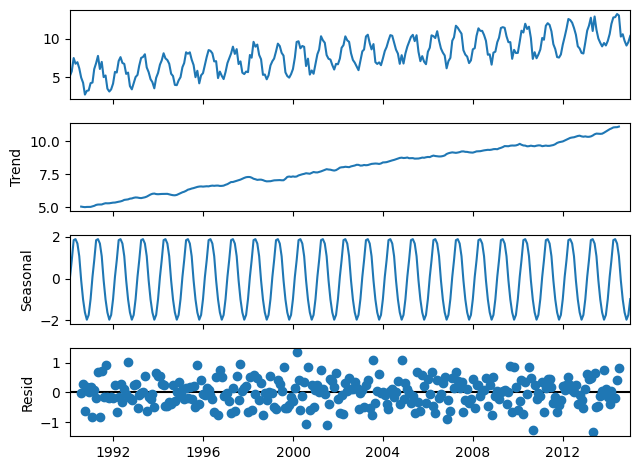

In [78]:
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) 
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(seasonal) 
print(decomp[:12])
decomp[-12:]

You can see the time series is now decomposed into the three components. Notice that the first and last 6 values of the trend and seasonal component are missing. These missing values arise from the estimation of the seasonal component which must be truncated at the ends of the time series. We must take these missing values into account when performing any analysis. 

It appears that the STL process has removed most of the trend and seasonal components of the time series for the most part. We can do further analysis to understand these results. To do so, execute the code in the cell below to display some evaluation plots and summary statistics for the residual series. Notice that the first and last 6 samples are censored from the residual series which contain `nan` values.    

      lb_stat     lb_pvalue
1   14.317477  1.544245e-04
2   16.103461  3.185501e-04
3   20.582041  1.285561e-04
4   23.712397  9.120761e-05
5   39.312677  2.054378e-07
6   40.040931  4.471556e-07
7   40.340125  1.083486e-06
8   41.476648  1.697539e-06
9   43.194749  1.985228e-06
10  44.382321  2.809876e-06
11  47.571656  1.701891e-06
12  52.620651  4.811323e-07
13  57.711656  1.342802e-07
14  58.107400  2.512182e-07
15  58.762041  4.111742e-07
16  59.557985  6.211589e-07
17  60.080975  1.019052e-06
18  60.160876  1.927136e-06
19  61.807404  1.996675e-06
20  66.537142  6.625424e-07
21  66.548611  1.242571e-06
22  66.548858  2.283140e-06
23  66.642709  3.966423e-06
24  67.220361  5.717609e-06
25  70.258691  3.521888e-06
26  70.549444  5.516679e-06
27  70.554656  9.345358e-06
28  71.593526  1.111157e-05
29  72.504840  1.366888e-05
30  72.517899  2.215896e-05
31  74.305993  2.036504e-05
32  74.388592  3.163111e-05
33  74.405543  4.937515e-05
34  74.405577  7.630249e-05
35  74.611659  1.094

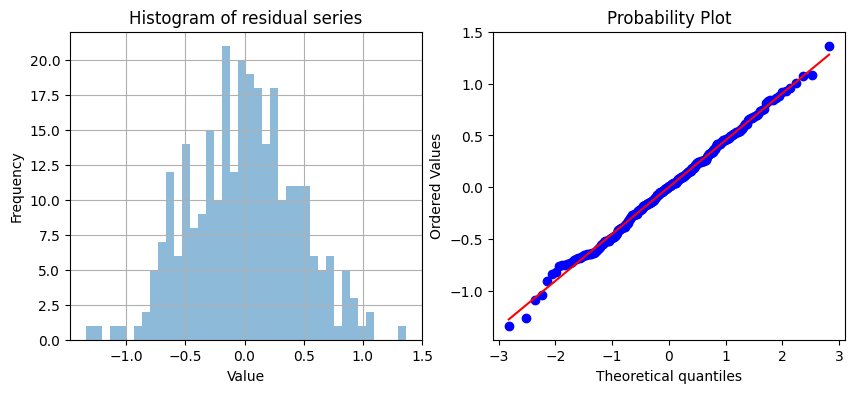

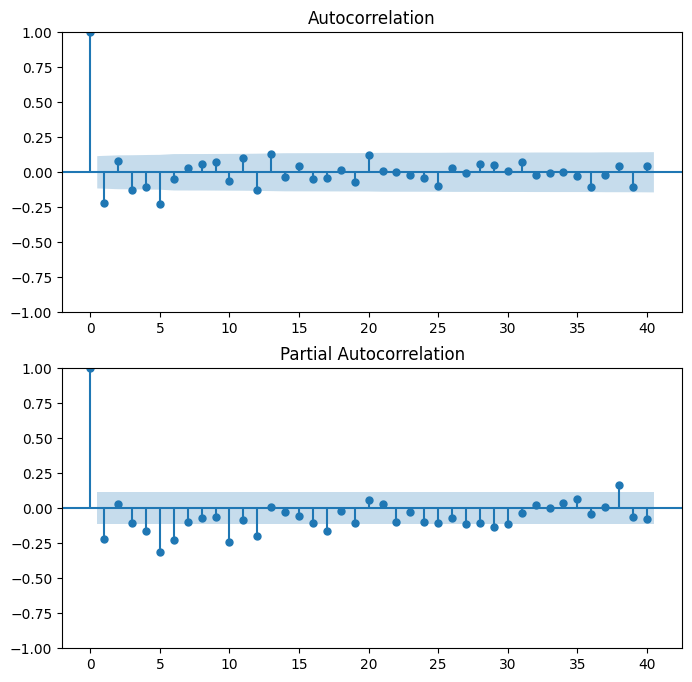

In [79]:
def evaluate_resids(residual_series, title='residual series', regression_model='c', ljungbox=True, ADF=True):
    dist_ts(residual_series, title) 
    auto_partial_corr_plot(residual_series)
    if(ljungbox==True): print(acorr_ljungbox(residual_series, lags=40, model_df=0))
    if(ADF==True): print(stationary_tests([residual_series], [title], regression_model=regression_model))
                
        
evaluate_resids(decomp[6:-6].resid)    

Notice the following observations about these results:   
1. There is some significant autocorrelation, as evidenced by the Ljung Box test, so the residuals are not white noise.    
2. The residuals appear to be close to Normally distributed.     
3. The ADF and KPSS tests indicate that the residuals are stationary.   

### Another STL Example      

We will now try an example using some real-world data. The data are for the production of certain dairy products in the State of California, compiled by the California Department of Agriculture. To load these data and display the head of the data frame and plots of the milk produciton and log milk production.     

,Unnamed: 0,Year.Month,Month.Number,Year,Month,Cottagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,LogMilkProd
1995-01-01,1,1995.01,1,1995,Jan,4.370,51.595,2.112,0.9803,0.747635
1995-02-01,2,1995.02,2,1995,Feb,3.695,56.086,1.932,0.8924,0.658556
1995-03-01,3,1995.03,3,1995,Mar,4.538,68.453,2.162,0.8924,0.771034
1995-04-01,4,1995.04,4,1995,Apr,4.280,65.722,2.130,0.8967,0.756122
1995-05-01,5,1995.05,5,1995,May,4.470,73.730,2.227,0.8967,0.800655
...,...,...,...,...,...,...,...,...,...,...
2013-08-01,224,2013.08,8,2013,Aug,2.169,78.382,3.400,1.6273,1.223775
2013-09-01,225,2013.09,9,2013,Sept,2.193,74.871,3.197,1.5519,1.162213
2013-10-01,226,2013.10,10,2013,Oct,2.284,70.011,3.338,1.5566,1.205372
2013-11-01,227,2013.11,11,2013,Nov,1.865,61.394,3.275,1.7537,1.186318


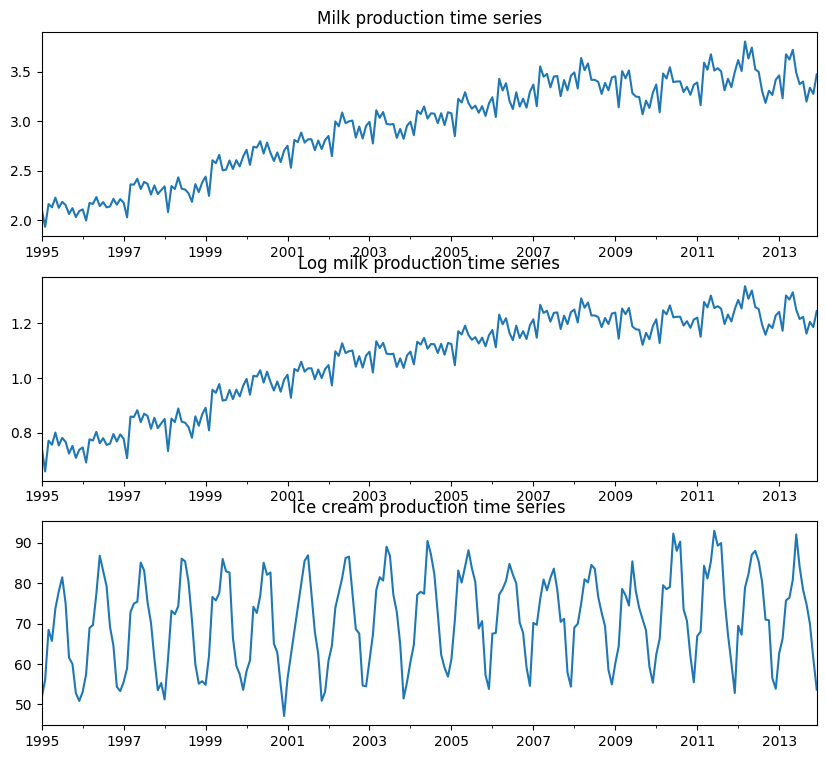

In [80]:
CA_dairy = pd.read_csv('../data//cadairydata.csv')
CA_dairy.index = pd.to_datetime('1 ' + CA_dairy['Month.Number'].astype(str) + ' ' + CA_dairy['Year'].astype(str), format='%d %m %Y')
CA_dairy['LogMilkProd'] = np.log(CA_dairy['Milk.Prod'])

_,ax = plt.subplots(3,1, figsize=(10,9))
cols =['Milk.Prod','LogMilkProd','Icecream.Prod']
titles = ['Milk production time series','Log milk production time series','Ice cream production time series']
for ax_i, col, title in zip(ax, cols, titles):
    CA_dairy[col].plot(title=title, ax=ax_i)
    
CA_dairy    

There are several key observations that are important when working with these time series.   
1. None of these series are stationary. At the minimum, both the milk and ice cream series exhibit seasonal behavior. There is a strong trend in milk production and a possible trend in ice cream production.     
2. The variance of the milk production series is not constant. It appears that the log transformation of this series stabilizes the variance.
3. The seasonality of the ice cream series is close to constant over time. An additive model should be appropriate for this series.   

> **Exercise: 32-5:** You will now apply STL decomposition to the log milk time series and evaluate the results by the following steps:    
> 1. Compute the decomposition of the log milk time series, display the results, and save them to a variable `decomp_milk`.

               resid     trend  seasonal
1995-01-01       NaN       NaN  0.009169
1995-02-01       NaN       NaN -0.063646
1995-03-01       NaN       NaN  0.046570
1995-04-01       NaN       NaN  0.026694
1995-05-01       NaN       NaN  0.053586
1995-06-01       NaN       NaN  0.004263
1995-07-01  0.026259  0.746283  0.008616
1995-08-01  0.016510  0.747581  0.002307
1995-09-01  0.014267  0.749151 -0.039741
1995-10-01  0.008047  0.750003 -0.006162
1995-11-01 -0.003504  0.750755 -0.039215
1995-12-01 -0.011135  0.751219 -0.002441


,resid,trend,seasonal
2013-01-01,0.002499,1.230179,0.009169
2013-02-01,0.006582,1.229856,-0.063646
2013-03-01,0.024035,1.231219,0.046570
2013-04-01,0.028554,1.231778,0.026694
2013-05-01,0.027831,1.232307,0.053586
2013-06-01,0.012240,1.233112,0.004263
2013-07-01,NaN,NaN,0.008616
2013-08-01,NaN,NaN,0.002307
2013-09-01,NaN,NaN,-0.039741
2013-10-01,NaN,NaN,-0.006162


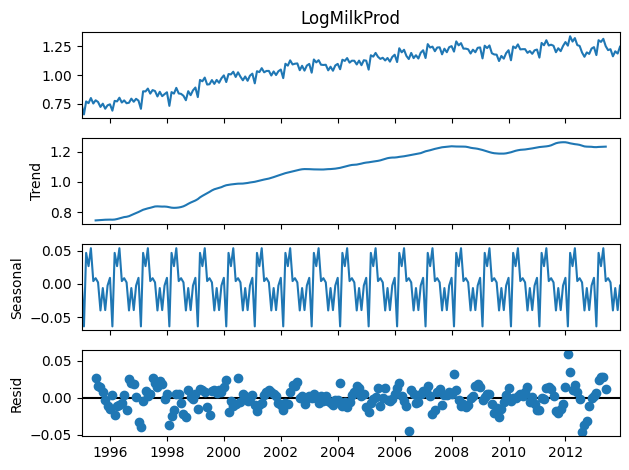

In [81]:
## Put your code below    
decomp_milk = decomp_ts(CA_dairy['LogMilkProd'])

print(decomp_milk[:12])
decomp_milk[-12:]

> 2. Use the `evaluate_resids` function to the residuals to evaluate the decomposition of the time series.

       lb_stat     lb_pvalue
1    54.104894  1.900673e-13
2    59.666094  1.105789e-13
3    61.844409  2.371958e-13
4    78.295934  3.998688e-16
5    94.725276  6.821276e-19
6   116.908368  7.263204e-23
7   133.631330  1.094592e-25
8   142.262717  8.026335e-27
9   142.590562  3.009275e-26
10  146.709752  1.769654e-26
11  155.229514  1.270035e-27
12  158.029221  1.323583e-27
13  158.420788  4.114071e-27
14  158.978084  1.138872e-26
15  159.352901  3.310672e-26
16  160.579175  6.308510e-26
17  164.570794  3.330989e-26
18  164.906561  9.096072e-26
19  165.745990  1.927362e-25
20  165.791538  5.689466e-25
21  165.943708  1.560832e-24
22  165.973209  4.412319e-24
23  165.974633  1.233310e-23
24  166.092401  3.203851e-23
25  169.545654  1.926502e-23
26  170.135848  3.957461e-23
27  170.757021  7.889814e-23
28  170.796721  1.982463e-22
29  171.466223  3.749265e-22
30  171.530117  9.013657e-22
31  173.578829  9.310978e-22
32  174.293342  1.662526e-21
33  174.869796  3.104140e-21
34  175.287329

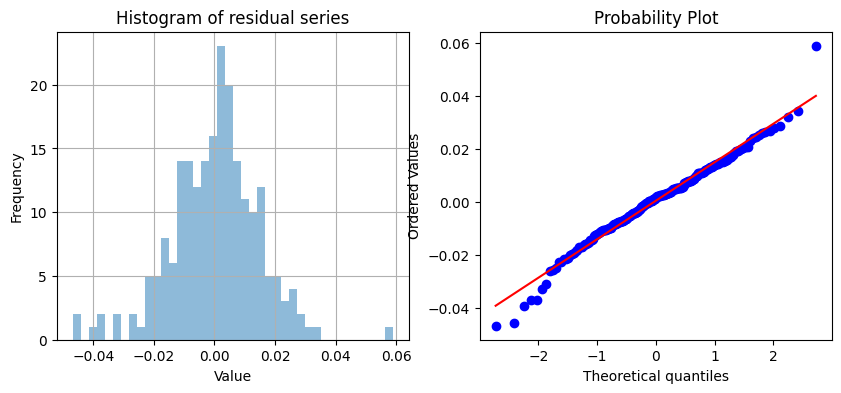

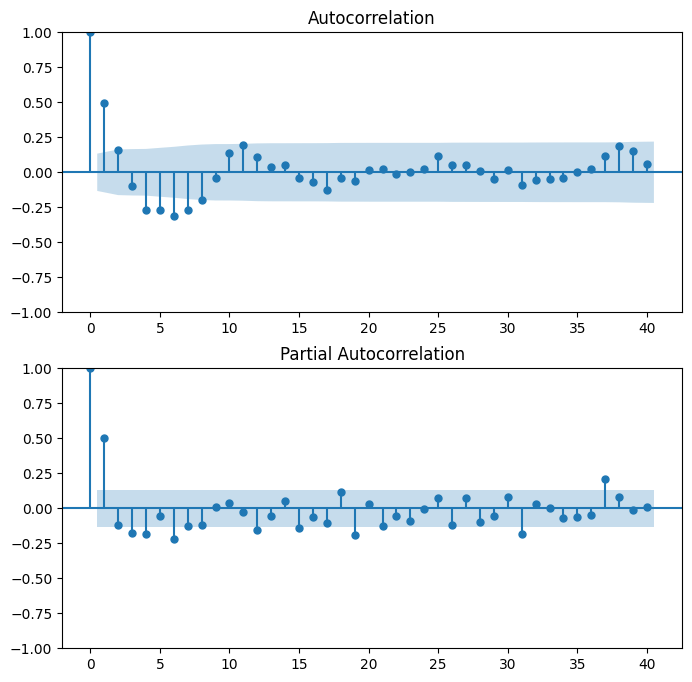

In [82]:
## Put your code below  
evaluate_resids(decomp_milk[6:-6].resid)

> Examine these results and answer the following questions:     
> 1. Do the ACF, PACF, and Ljung-Box tests show evidence of serial correlation in the residuals, and how do these values compare to the original series?    
> 2. Is the distribution of the residuals close to a Normal distribution?      
> 3. Based on the ADF and KPSS statistics and p-values are the residuals stationary and why?  

> **Answers:**    
> 1. The ACF and PACF show a couple significant lags where some seasonal correlation may be present, but they mostly show serial correlation. The Ljung-Box shows low p-values in general, lining up with the serial correlation assumption. The resids look much better than the original series as they're far more stationary than the time series itself.     
> 2. The residuals do seem to follow an essentially normal curve, though there are some exceptions.           
> 3. The ADF and KPSS show the residuals are stationary since we have a low and high p-value respectively.             

### Example: Decomposing the time series

We will now use linear models to perform a time series decomposition of the log of the milk time series. This decompositon will be performed by the following steps.     
1. Use the trend computed with the LOESS algorthm from the STL decomposition to remove the trend from the series.
2. Compute 12 monthy adjustments for the seasonality to remove the seasonality from the series.
3. Evaluate the stationarity and statistical properties of the residuals.

As a first step, execute the code in the cell below to detrend the time series and display the results.  

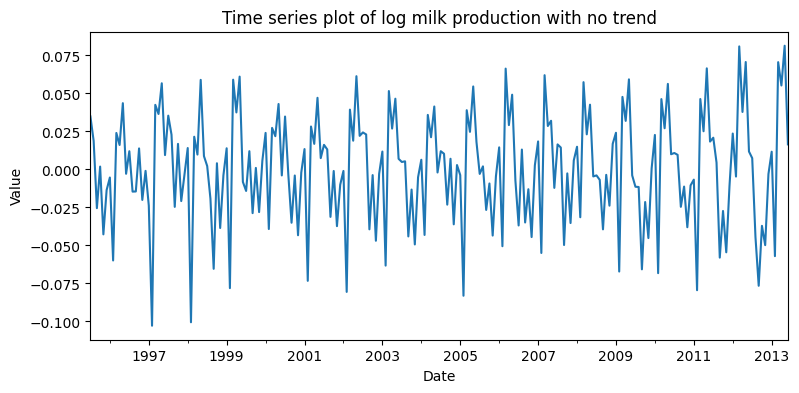

In [83]:
CA_dairy['LogMilkProdNoTrend'] = CA_dairy['LogMilkProd'][6:-6] - decomp_milk[6:-6].trend
CA_dairy['month'] = CA_dairy.index.month
plot_ts(CA_dairy['LogMilkProdNoTrend'][6:-6], 'log milk production with no trend')

It appears that the time series has been succesfully detrended.   

The next step is to find the montly adjustment factor using a linear model. Execute the code in the cell below to fit a linear model and display the summary.  

In [84]:
import statsmodels.formula.api as smf
seasonal_model = smf.ols(formula = 'LogMilkProdNoTrend ~ -1 + C(month)', data=CA_dairy).fit()
seasonal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LogMilkProdNoTrend   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     96.19
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           2.01e-74
Time:                        21:50:56   Log-Likelihood:                 607.47
No. Observations:                 216   AIC:                            -1191.
Df Residuals:                     204   BIC:                            -1150.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]      0.0096      0.004      2.727      0.007       0.003       0.017
C(month)[2]     -0.0632      0.004    -17.930      0.000      -0.070      -0.056
C(month)[3]      0.0470      0.004     13.338      0.000       0.040       0.054
C(month)[4]      0.0271      0.004      7.699      0.000       0.020       0.034
C(month)[5]      0.0540      0.004     15.328      0.000       0.047       0.061
C(month)[6]      0.0047      0.004      1.336      0.183      -0.002       0.012
C(month)[7]      0.0091      0.004      2.571      0.011       0.002       0.016
C(month)[8]      0.0028      0.004      0.781      0.436      -0.004       0.010
C(month)[9]     -0.0393      0.004    -11.148      0.000      -0.046      -0.032
C(month)[10]    -0.0057      0.004     -1.622      0.106      -0.013       0.001
C(month)[11]    -0.0388      0.004    -10.999      0.000      -0.046      -0.032
C(month)[12]    -0.0020      0.004     -0.566      0.572      -0.009       0.005
==============================================================================
Omnibus:                       10.061   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.213
Skew:                          -0.153   Prob(JB):                     6.73e-05
Kurtosis:                       4.429   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is a bit overfit with some mothly adjustments that are not statistically significant. One could justify setting these coeffcients to 0. In this case, we will just use the estimates, since they are all small numbers.     

> *Note:* The OLS model used to compute the seasonal adjustments does not account for the seasonal serial correlation. The presence of serial correlation will inflate the variance of the model beyond the iid estimate. As a result, the use of an OLS model to estimate seasonal adjustments is an approximation.      

Next, execute the code in the cell below to apply the adjustments to the time series and examine the evaluation results. This is easily done by using the `predict` method of the linear model.   

       lb_stat     lb_pvalue
1    54.104894  1.900673e-13
2    59.666094  1.105789e-13
3    61.844409  2.371958e-13
4    78.295934  3.998688e-16
5    94.725276  6.821276e-19
6   116.908368  7.263204e-23
7   133.631330  1.094592e-25
8   142.262717  8.026335e-27
9   142.590562  3.009275e-26
10  146.709752  1.769654e-26
11  155.229514  1.270035e-27
12  158.029221  1.323583e-27
13  158.420788  4.114071e-27
14  158.978084  1.138872e-26
15  159.352901  3.310672e-26
16  160.579175  6.308510e-26
17  164.570794  3.330989e-26
18  164.906561  9.096072e-26
19  165.745990  1.927362e-25
20  165.791538  5.689466e-25
21  165.943708  1.560832e-24
22  165.973209  4.412319e-24
23  165.974633  1.233310e-23
24  166.092401  3.203851e-23
25  169.545654  1.926502e-23
26  170.135848  3.957461e-23
27  170.757021  7.889814e-23
28  170.796721  1.982463e-22
29  171.466223  3.749265e-22
30  171.530117  9.013657e-22
31  173.578829  9.310978e-22
32  174.293342  1.662526e-21
33  174.869796  3.104140e-21
34  175.287329

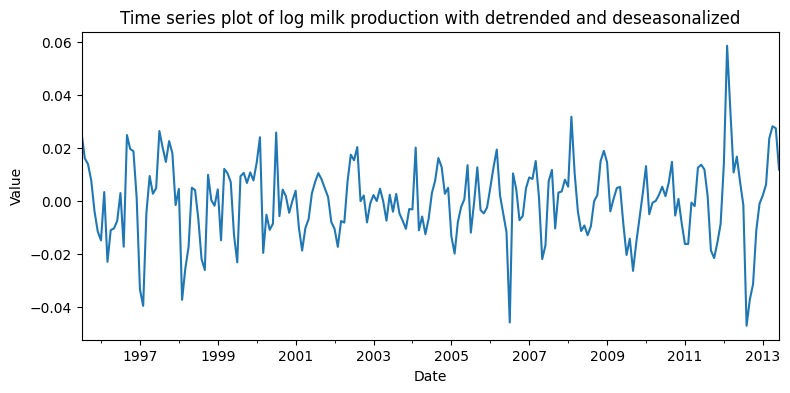

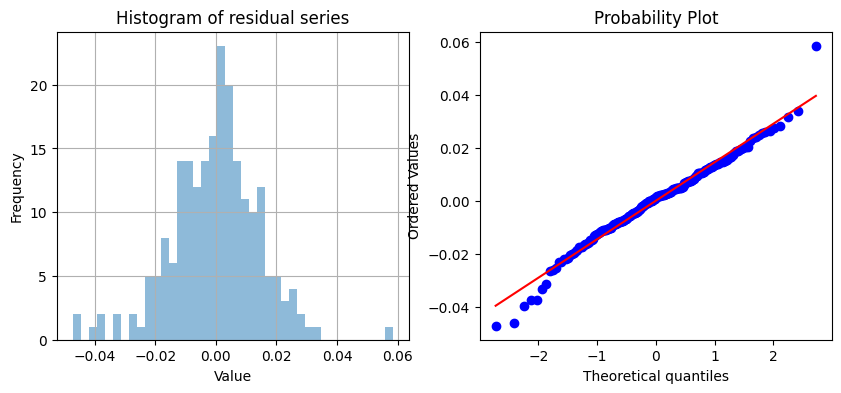

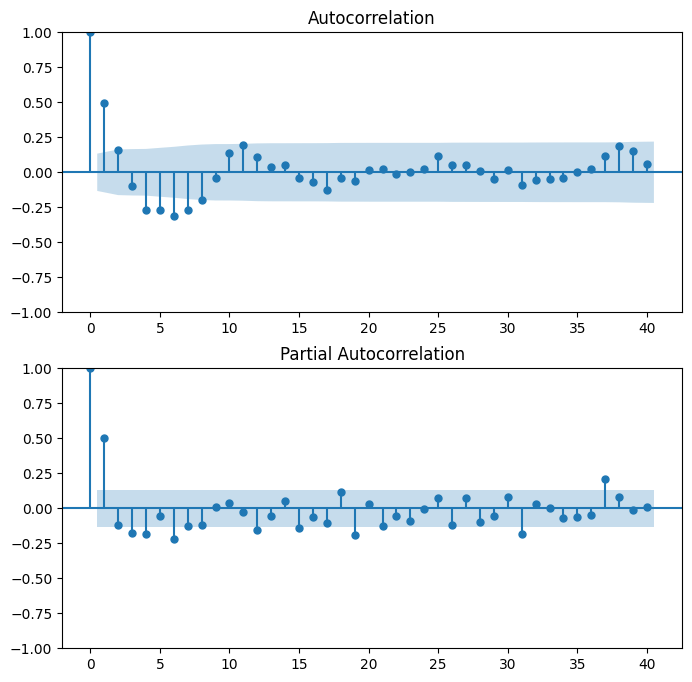

In [85]:
CA_dairy['LogMilkProdNoTrendNoSeason'] = CA_dairy['LogMilkProdNoTrend'] - seasonal_model.predict(CA_dairy) 
plot_ts(CA_dairy['LogMilkProdNoTrendNoSeason'][6:-6], 'log milk production with detrended and deseasonalized')
evaluate_resids(CA_dairy['LogMilkProdNoTrendNoSeason'][6:-6])  

Examining the above results we can draw the following conclusions:     
1. The ADF test and the KPSS test all indicate that the residuals are stationary.      
2. The distirbuiton of the residuals is nearly Normal.     
3. The ACF and PACT and the Ljung-Box Q statistic test show that the residuals still have information that can be used to model the detrended and deserialized time series.     
4. The ACF and PACF show some significant vlaues and lags around 6. This is likely the result of using a model that ignores serial correlation to estimate the seasonal adjustment.   
5. The small value of the Durban-Watson statistic ($<2$) in the model summary and results of the  indicate that the residuaals do have serial correlaiton, indicating there is information in the residuals after detrending and deserializing.     

## Differencing operators and random walks

We have just seen how the trend and seasonal components of a time series can be found using a decomposition model. Is there an alternative? Yes, **difference operators** can be used to remove seasonal, and random walk components. Deterministic and stochastic trend components are modeled using other methods, as is discussed in the next chapter.     

Difference operators can be over any number of lags. Lag 1 difference operators can be applied to remove random walks. Seasonal components can be removed by taking differences in the seasonal period. Further, we can apply difference operators more than once to the same series. For example, one can apply the following process:      
> 1. Apply difference operators of the seasonal period to remove the seasonal components.       
> 2. Test for stationarity of the resulting series.    
> 3. Apply another first difference operator to remove random walk components.    
> 4. Test for stationarity of the resulting series.   

For a random walk, a **first order difference operator** transforms the time series to a series of the **innovations or shocks**. An example will illustrate this point. Consider the plot below of the first-order differences of the random walk time series we explored earlier. The differences are computed using the Pandas [diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) function. A first order difference series is one time-step shorter than the original series. Therefore the first sample is removed from the difference series with the *[1:]* operator. 

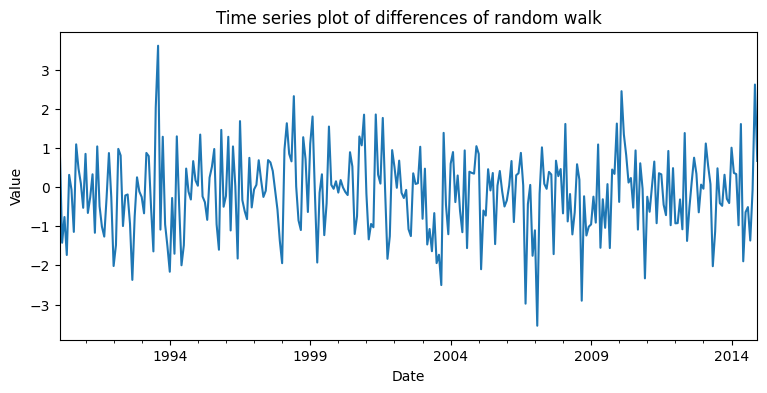

In [86]:
walk_diffs = walk.diff()[1:]
_=plot_ts(walk_diffs, 'differences of random walk')

The difference series looks rather, random. What are the statistical properties? Is this now white noise? To find out, we will plot the ACF and PACF using the code in the cells below. 

> **Exercise 32-6:** The question is what are the statistical properties of the remainder series the first order differencing operator has been applied. Display of the resulting series using the `evaluate_resids`. **Hint:** You will need to remove the first value from the difference series since the difference operator cannot work on the first element of a time series. 

      lb_stat  lb_pvalue
1    0.884153   0.347067
2    1.689604   0.429642
3    1.703516   0.636152
4    2.093914   0.718491
5    3.922961   0.560560
6    3.932259   0.685843
7    5.004667   0.659394
8    8.627952   0.374646
9    8.793119   0.456586
10  10.764379   0.376167
11  13.929341   0.236928
12  13.939242   0.304605
13  14.389448   0.347000
14  14.473116   0.415091
15  14.480417   0.489449
16  19.101626   0.263428
17  19.421453   0.304884
18  19.588697   0.356445
19  19.588702   0.419698
20  19.671496   0.478640
21  20.131792   0.512928
22  20.576078   0.547052
23  20.580525   0.606687
24  23.392177   0.496757
25  23.520827   0.547179
26  26.380075   0.442373
27  27.371538   0.443893
28  27.948886   0.467159
29  27.974165   0.519295
30  33.020586   0.321649
31  35.350250   0.270130
32  35.637451   0.301110
33  36.122720   0.324757
34  36.781810   0.341277
35  37.294392   0.363986
36  40.360545   0.283522
37  40.459833   0.320137
38  41.616262   0.316211
39  41.881683   0.346900


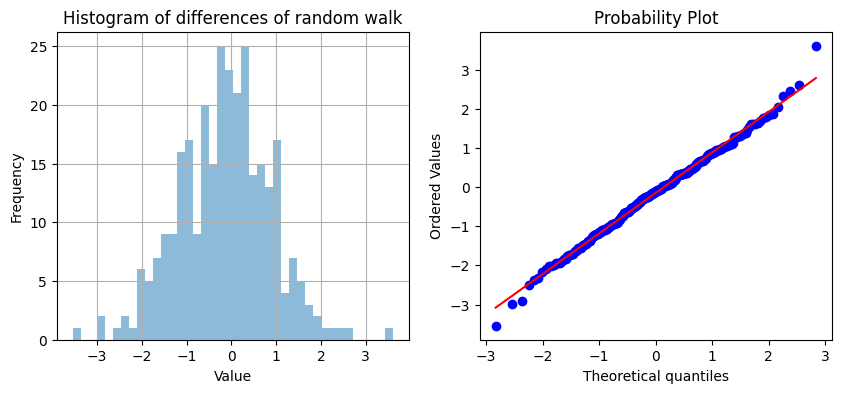

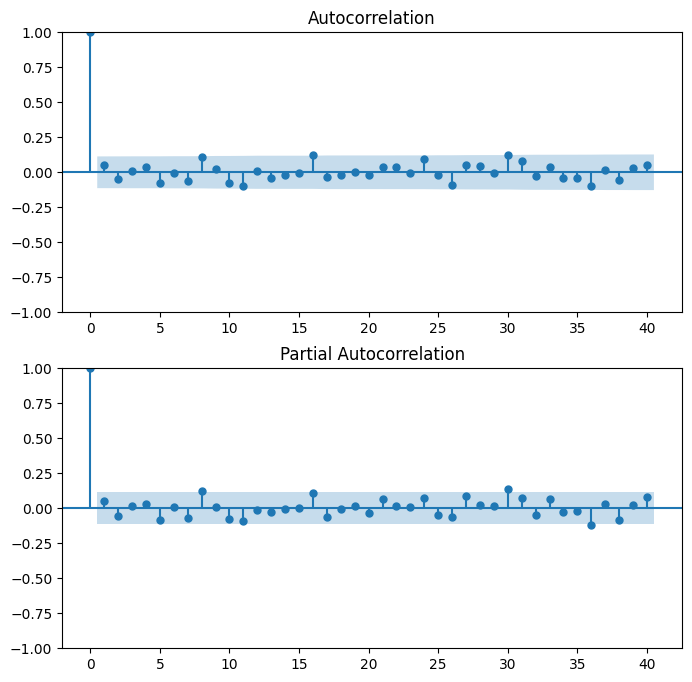

In [87]:
## Put your code below
evaluate_resids(walk_diffs, title='differences of random walk')


> Examine your results and answer the following questions:
> 1. Do the ACF, PACF, and Ljung-Box test show evidence of serial correlation in the residuals, and how do these values compare to the original series?    
> 2. Is the distribution of the residuals close to a Normal distribution?      
> 3. Based on the ADF and KPSS statistics and p-values are the residuals stationary and why?  

> **Answers:**      
> 1. We do see evidence of serial correlation due to the p-values of the Ljung-Box test and the regular nature of the ACF and PACF. This is far better than before where we saw significant lags in various locations, showing more information than just serial correlation.            
> 2. The residuals are very close to Normal with some minor deviations.         
> 3. Both the ADF and KPSS support the distribution being stationary.        

### Example: Differencing the milk production time series        

We have already observed that the log-milk production time series has both trend and seasonality. We will now explore if the seasonality can be modeled with a differencing operator. A second question is if the resulting series is stationary.      

To start, execute the code in the cell below to perform the following operations on the log milk production series:     
1. Plot the log milk production time series.      
2. Display ACF and PACF plots.   
3. Compute and display the ADF and KPSS tests.    

Execute this code. 

,ADF_statistic,ADF_conf_int,ADF_p_value,KPSS_statistic,KPSS_p_value
Log Milk Production Series,-2.318,-2.875,0.166,2.2,0.01


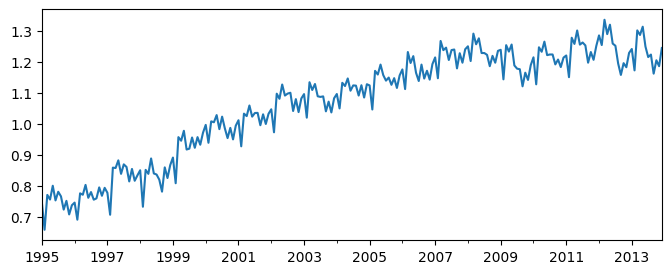

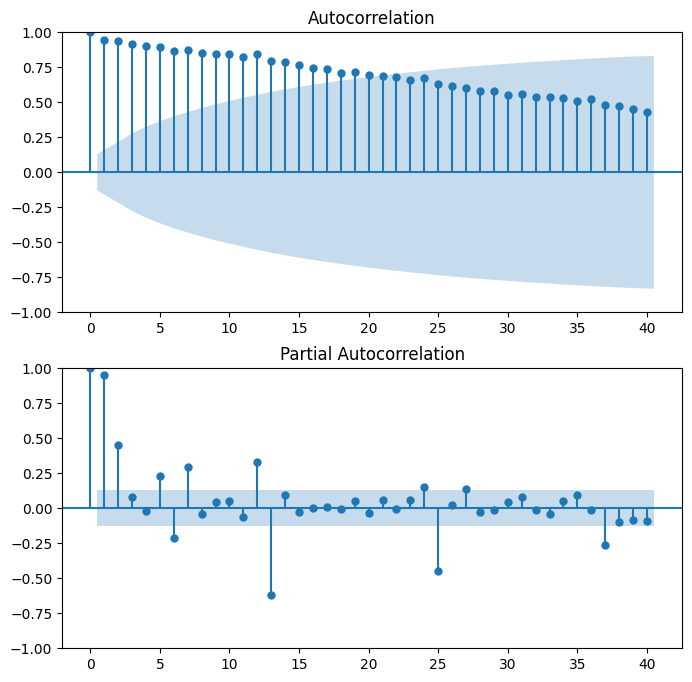

In [88]:
_,ax = plt.subplots(figsize=(8,3))
CA_dairy['LogMilkProd'].plot(ax=ax)
auto_partial_corr_plot(CA_dairy['LogMilkProd'])
stationary_tests([CA_dairy['LogMilkProd']], ['Log Milk Production Series'])

Examine these results, noticing the following:     
1. Not surprisingly, given the trend and seasonal behavior, the ADF and KPSS tests indicate that the series is not stationary. Further, the ACF shows the effect of the trend and the PACF has peaked at multiples of 12 lags.    
2. The variance of the log-transformed series appears to be fairly constant.    

### Example of trend and seasonal differencing   

You will now apply trend and seasonal differenceing to the log milk time series. This operation involves using two difference operators.    
1. $\nabla = x_t - x_{t-1}$ is a **stride one difference** operator.
2. $\nabla_S = x_t - x_{t-S}$ is the differnce operator for **seasonal period stride, S**.

To apply the product of these operators $\nabla \nabla_S$ we need to apply some algebra, to get a stationary series, $W_t$.             
\begin{align}
W_t &= \nabla \nabla_S y_t = \nabla_S y_t - \nabla_S y_{t-1} \\
&= (y_t - y_S) - (y_{t-1} - y_{S+1})
\end{align} 

For annual seasonal 12 month period, for this relationship becomes.

$$W_t = (y_t - y_{12}) - (y_{t-1} - y_{13})$$

> **Exercise 32-7:** You will now determine if seasonal differencing can provide a reasonable. To get started get these steps:     
> 1. Compute a difference series using the 12 month period of the seasonal behavior as an argument to the [pandas.DataFrame.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) method. The difference is then differenced again by subtracting the difference series less the first value (use the [1:] slice operator) for a back-shift of 1, from the difference series less the last value (use the [:-1] slide operator).           
> 2. Display a time series plot of the difference series.      
> 3. Apply the `evaluate_resids` function to the difference series.    
> Execute your code.    

       lb_stat     lb_pvalue
1     5.682035  1.713948e-02
2     8.110769  1.732881e-02
3     8.130983  4.338084e-02
4     9.099530  5.865929e-02
5    21.861128  5.563987e-04
6    22.893067  8.330957e-04
7    23.825733  1.222544e-03
8    24.253555  2.077801e-03
9    24.346373  3.786019e-03
10   27.063192  2.545053e-03
11   33.984554  3.638004e-04
12   84.751069  5.081546e-13
13   86.221015  7.345381e-13
14   88.774170  6.464647e-13
15   89.319253  1.328527e-12
16   90.640357  1.906434e-12
17   96.474621  3.985820e-13
18   96.701381  8.867497e-13
19   96.795977  2.028294e-12
20   97.352214  3.739077e-12
21   97.548458  7.810205e-12
22   98.437002  1.208322e-11
23   99.628710  1.631664e-11
24   99.872896  3.158073e-11
25  108.012573  2.714181e-12
26  112.249946  1.088213e-12
27  112.616396  1.999949e-12
28  112.623816  4.156509e-12
29  113.371963  6.385839e-12
30  119.596719  1.191911e-12
31  122.816126  7.071645e-13
32  123.174534  1.250953e-12
33  123.753533  2.009297e-12
34  123.814418

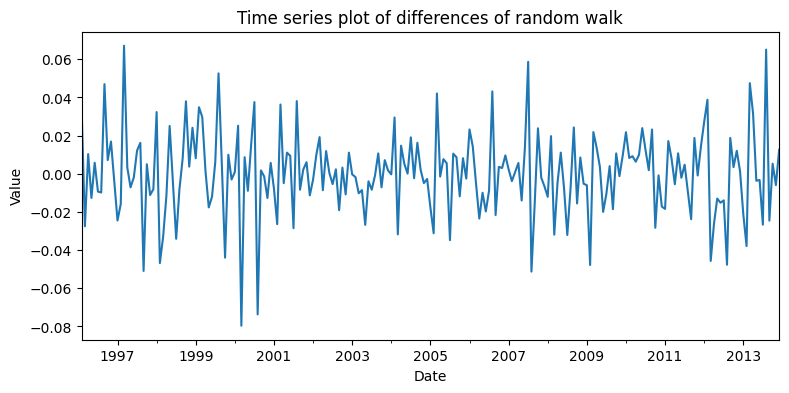

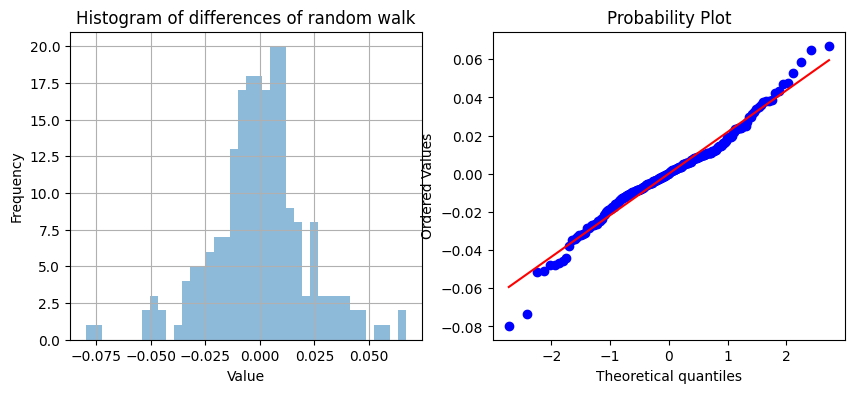

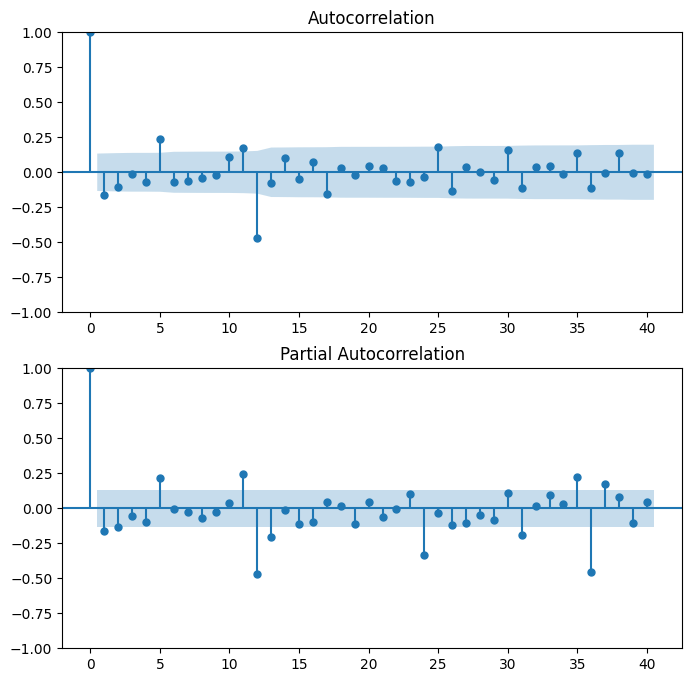

In [89]:
## Put your code below
ts_12month = CA_dairy['LogMilkProd'].diff(periods=12)
ts_diff_again = ts_12month[12:].diff(periods=1)                                     
plot_ts(ts_diff_again[1:], 'differences of random walk')
evaluate_resids(ts_diff_again[1:], title='differences of random walk')






> Carefully examine your results and answer these questions:  
> 1. Do the ACF, PACF, and Ljung-Box tests show evidence of serial correlation in the residuals, and how do these values compare to the original series?     
> 2. Is a component of the serial correlation seasonal and why?         
> 3. Is the distribution of the residuals close to a Normal distribution?      
> 4. Based on the ADF and KPSS statistics and p-values are the residuals stationary and why?   

> **Answers:**     
> 1. The ACF, PACF, and Ljung-Box tests do show evidence of serial correlation in the residuals, but we still have some significant lag values in both the ACF and PACF, but these tests are far cleaner than the original series. The ACF has lost much of the linear, high significant decay, and much of the seasonality has been removed from the PACF.            
> 2. Yes, there appears to be a component of the seasonal correlation still evident every 12 months. This is obivious due to the high significance lags every 12 months.        
> 3. Yes, the residuals are clost to normal and far more so than before with other methods.           
> 4. Yes, there's evidence that the residuals are stationary since the ADF p value is low and the KPSS is high.          

#### Copyright 2018, 2019, 2020, 2021, 2022, 2023, 2024 Stephen F Elston. All rights reserved.  